# Twitter sentimental analysis

In [8]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [9]:
# importig libires
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import psutil


import nltk
import re
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import SnowballStemmer
from multiprocessing import Pool

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.metrics import accuracy_score, confusion_matrix





[nltk_data] Downloading package stopwords to C:\Users\Rawlings
[nltk_data]     Bond\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tokenizer = AutoTokenizer.from_pretrained("DunnBC22/bert-base-uncased-Twitter_Sentiment_Analysis_v2")
model = AutoModelForSequenceClassification.from_pretrained("DunnBC22/bert-base-uncased-Twitter_Sentiment_Analysis_v2")

In [11]:
# Specify the encoding parameter when reading the CSV file ('latin-1')
dataset = pd.read_csv(r"C:\Users\Rawlings Bond\Documents\twitter sentimental\dataset\training.1600000.processed.noemoticon.csv", encoding='latin-1')

dataset.head(15)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [12]:
# infomation 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [13]:
# datset shape
dataset.shape

(1599999, 6)

In [14]:
# Renames the columns of the dataset DataFrame to ["Sentiment", "Id", "Date", "Query", "User", "Tweet"]
# Displays the first few rows of the DataFrame after renaming the columns

dataset.columns = ["Sentiment", "Id", "Date", "Query", "User", "Tweet"]
dataset.head()

,Sentiment,Id,Date,Query,User,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [15]:
# Removes columns "Id", "Date", "Query", and "User" from the DataFrame df along the specified axis (columns)
# Displays the first few rows of the DataFrame after dropping the specified columns

dataset.drop(["Id", "Date", "Query", "User"], axis=1)
dataset.head()


,Sentiment,Id,Date,Query,User,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [16]:
# shows unique values present in sentiment.
dataset["Sentiment"].unique()

array([0, 4], dtype=int64)

In [17]:
# Replaces numeric values in the "Sentiment" column with corresponding string labels:
# Replaces 0 with "Negative"
# Replaces 4 with "Positive"
dataset["Sentiment"] = dataset["Sentiment"].replace({0: "Negative", 4: "Positive"})
dataset.head()

,Sentiment,Id,Date,Query,User,Tweet
0,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Negative,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Positive    800000
Negative    799999
Name: Sentiment, dtype: int64

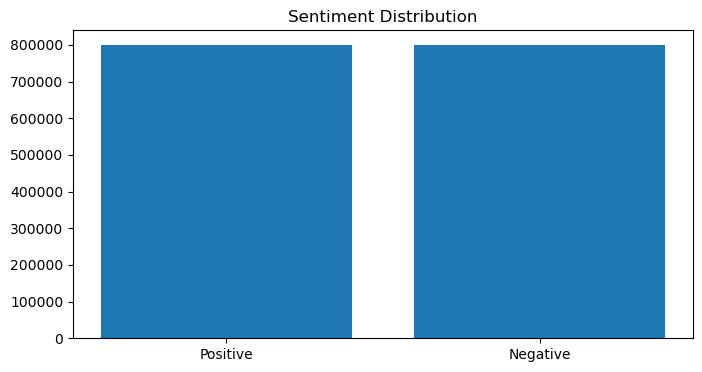

In [18]:
plt.figure(figsize=(8,4))
plt.bar(dataset["Sentiment"].value_counts().index, dataset["Sentiment"].value_counts().values )
plt.title("Sentiment Distribution")

dataset["Sentiment"].value_counts()

# Text preprocesing 

In [19]:
# Define stopwords and stemmer
nltk.download('stopwords')
stopwords_eng = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

# Remove unnecessary words and signs
corpus = []

# Precompile regular expression pattern
pattern = re.compile(r"@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+|[^\w\s]")

# Iterate over each tweet in the DataFrame using list comprehension
corpus = [
    " ".join([stemmer.stem(word) for word in tweet.lower().split() if word not in stopwords_eng])
    for tweet in dataset["Tweet"].values
]

# Make sure it worked
num_sentences = 20  
random_indices = random.sample(range(len(corpus)), num_sentences)
for index in random_indices:
    print(corpus[index])

[nltk_data] Downloading package stopwords to C:\Users\Rawlings
[nltk_data]     Bond\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


@strawburry17 pull string hoodie. keep pull do know am?! line. -_- on!
@kawehdashti sporadic, get them. unpredic
thought would fun go bar last night. realli expect coat car &amp; hous key pocket stolen
watch wizard waver place
it gravy, baby, life lovely. even grey rain cloud right me. forgot much love song.
@bonesfan021 daughter cute. hope twitter behav hours..
tri figur person download wordpress blog! easi hope suggestions?
@sky14kemea might get it, wii
mani book read
head acid im sun long
schedul appoint get license!
@alexistrees coincid fell tea? think
@donniesburg69 oh hun...i feel sorri you..i`m wanna talk.. got help doctor?
mar reduc size eponym bar 62.5g 58g
look forward futur can't wait see what store me.
@danielledeleasa yeeah!! too! amazing!!! i'm freak lol
@tmstier @hstuart3 meghan psych tomorrow. anxieti make new friends, apparently!
gettin wet. raini dayz
nugget wonnn last night innnn lol, fridayayay
head home. forget #techlunchsouth tomorrow. @jguadagno hate cancel last 

# Using pre-trained Model from Hugging Face


In [20]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [21]:
tokenizer = AutoTokenizer.from_pretrained("DunnBC22/bert-base-uncased-Twitter_Sentiment_Analysis_v2")
model = AutoModelForSequenceClassification.from_pretrained("DunnBC22/bert-base-uncased-Twitter_Sentiment_Analysis_v2")

In [22]:
sentiment_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [23]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("DunnBC22/bert-base-uncased-Twitter_Sentiment_Analysis_v2")
model = AutoModelForSequenceClassification.from_pretrained("DunnBC22/bert-base-uncased-Twitter_Sentiment_Analysis_v2")

# Create sentiment analysis pipeline
sentiment_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Define the number of rows to analyze
num_rows = 15

# Initialize list to store sentiments
sentiments = []

# Analyze the sentiment for the first 15 rows of data
for text in corpus[:num_rows]:
    result = sentiment_pipeline(text)[0]
    sentiments.append({"text": text, "sentiment": result["label"], "score": result["score"]})

# Create DataFrame from sentiments
sentiment_df = pd.DataFrame(sentiments)

# Print the first 15 rows of data
print(sentiment_df)

# Save DataFrame to CSV file
sentiment_df.to_csv("sentiments_data.csv", index=False)


                                                 text sentiment     score
0   upset can't updat facebook text it... might cr...  negative  0.954948
1   @kenichan dive mani time ball. manag save 50% ...   neutral  0.651196
2                     whole bodi feel itchi like fire  negative  0.741446
3   @nationwideclass no, behav all. i'm mad. here?...  negative  0.977426
4                                @kwesidei whole crew  negative  0.913547
5                                            need hug   neutral  0.509398
6   @loltrish hey long time see! yes.. rain bit ,o...  positive  0.360320
7                                     @tatiana_k nope  negative  0.823789
8                               @twittera que muera ?   neutral  0.643347
9                     spring break plain city... snow   neutral  0.591845
10                                       re-pierc ear   neutral  0.548761
11  @caregiv bear watch it. thought ua loss embarr...  negative  0.943749
12  @octolinz16 counts, idk either. ne

In [24]:
sentiment_df = dataset.DataFrame(sentiments)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [ ]:
sentiment_df.head(15)

In [ ]:
sentiments